In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Using Pandas Inbuilt function to visualize all columns and rows present in Dataset
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

## Understanding the Data Sets 

We have two data sets which has details as below:-
- Application Data
- Previous Application Data

### Infomation about Data Sets

- Application Data contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
- Previous Application Data contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

### Reading the datasets and inspecting it to get to know what data it contains

In [4]:
#Read the data in pandas
app_data= pd.read_csv("application_data.csv")
prev_data= pd.read_csv("previous_application.csv")

In [5]:
#Checking the shape of datasets imported
print(app_data.shape)
print(prev_data.shape)

(307511, 122)
(1670214, 37)


In [6]:
#Checking the first five rows of app_data dataset
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#Checking the first five rows of prev_data dataset
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking the various datatypes of app_data dataset
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [9]:
# Print the information about the attributes of prev_data dataset
prev_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### Checking Null/Missing values

In [10]:
# Print the null count of each variables of app_data dataset
print(app_data.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
# Print the null count of each variables of prev_data dataset
print(prev_data.isnull().sum())

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### Calculating Percentage of Missing Values in Each Dataset

In [12]:
#Print the null percentage of each column of app_data.
app_data.isnull().sum().apply(lambda x : (x/307511)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [13]:
#Print the null percentage of each column of prev_data.
prev_data.isnull().sum().apply(lambda x : (x/1670214)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

## Insights on Data Inspection:-

- Application Dataset have 307511 rows and 122 columns in it
- Previous Application Dataset have 1670214 rows and 37 columns in it
- Both Datasets have mixed datatypes like int,float and object datatypes
- Their are some negative values also in both Data sets
- Null values varies from 13% to 70% in application dataset and 22% to 99% in previous application datasets.
- Basic Data cleaning like null tretment as well as standardization is required to process the data further

In [14]:
# Drop the columns in "app_data" which have more than 50% of missing values.
app_data.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG'
           ,'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG'
           ,'LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI'
           ,'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG'
           ,'BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MODE'
           ,'NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE'
           ,'WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI'
           ,'ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE'
           ,],axis=1,inplace=True)

In [15]:
# Drop the columns in "Prev_data" which have more than 50% of missing values.
prev_data.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT',],axis=1,inplace=True)

In [16]:
#Checking the shape of datasets again
print(app_data.shape)
print(prev_data.shape)

(307511, 81)
(1670214, 33)


### Checking Datatypes of Each Datasets and standardizing them

In [17]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [19]:
#Converting negative values to absolute values
app_data['DAYS_BIRTH']=app_data['DAYS_BIRTH'].abs()
app_data['DAYS_EMPLOYED']=app_data['DAYS_EMPLOYED'].abs()
app_data['DAYS_REGISTRATION']=app_data['DAYS_EMPLOYED'].abs()
app_data['DAYS_ID_PUBLISH']=app_data['DAYS_ID_PUBLISH'].abs()
app_data['DAYS_REGISTRATION']=app_data['DAYS_REGISTRATION'].abs()

In [20]:
#Converting DAYS_BIRTH Variable to Years in absolute values and rounding off for further Analysis purpose.
app_data['YEAR_BIRTH'] = app_data['DAYS_BIRTH'].apply(lambda x : round(x/365))

In [21]:
#Converting DAYS_BIRTH Variable to Years in absolute values and rounding off for further Analysis purpose.
app_data['YEAR_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x : round(x/365))

In [22]:
#Converting dtypes of variable DAYS_REGISTRATION based on nature of value stored in them
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype('int64')

In [23]:
#Rechecking the dtypes
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [24]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
prev_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP         

In [26]:
##Converting negative values to absolute values
prev_data['DAYS_DECISION']=prev_data['DAYS_DECISION'].abs()
prev_data['DAYS_FIRST_DRAWING']=prev_data['DAYS_FIRST_DRAWING'].abs()
prev_data['DAYS_FIRST_DUE']=prev_data['DAYS_FIRST_DUE'].abs()
prev_data['DAYS_LAST_DUE_1ST_VERSION']=prev_data['DAYS_LAST_DUE_1ST_VERSION'].abs()
prev_data['DAYS_LAST_DUE']=prev_data['DAYS_LAST_DUE'].abs()
prev_data['DAYS_TERMINATION']=prev_data['DAYS_TERMINATION'].abs()

In [27]:
#Checking the head again
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Insights after Basic Data Cleaning:-

- Application Dataset have 307511 rows and 81 columns in it after dropping columns having null values more than 50%
- Previous Application Dataset have 1670214 rows and 33 columns in it after dropping columns having null values more than 50%
- So about 41 columns gets dropped off in application dataset and 4 columns gets dropped off in previous application dataset
- DAYS_BIRTH Variable is holding ages in days which needs to be converted to Years for better analysis
- Variable with negative values are converted to positive values for further anaylsis 

## Outlier Detection and Analysis

In [28]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,67724.742149,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.938646,185.608021
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,139443.751806,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.964047,382.165887
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

#### Plotting Box plots for describing the Outliers present in Dataset

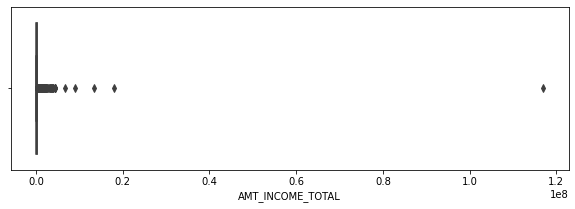

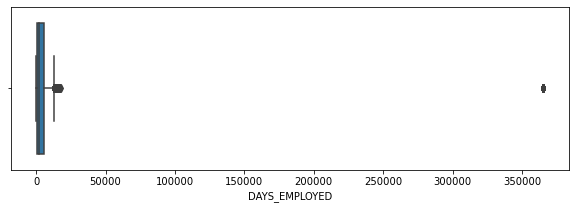

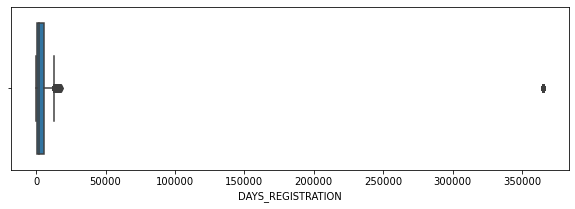

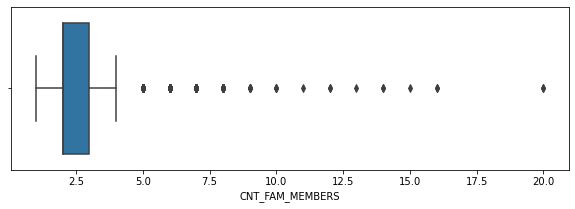

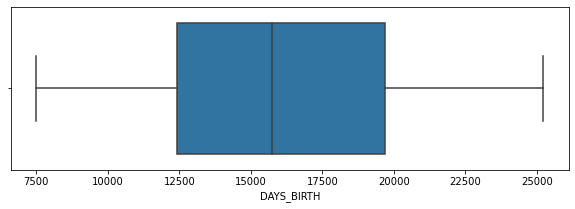

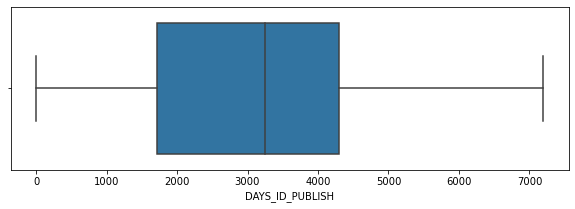

In [29]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(app_data['DAYS_EMPLOYED'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(app_data['DAYS_REGISTRATION'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(app_data['CNT_FAM_MEMBERS'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(app_data['DAYS_BIRTH'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(app_data['DAYS_ID_PUBLISH'])
plt.show()

In [30]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,8.806797e+02,3.139511e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,2.800000e+02,-1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Plotting Box plots for describing the Outliers present in Dataset

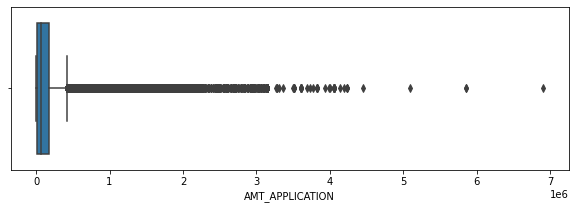

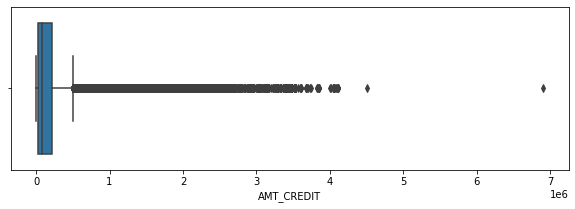

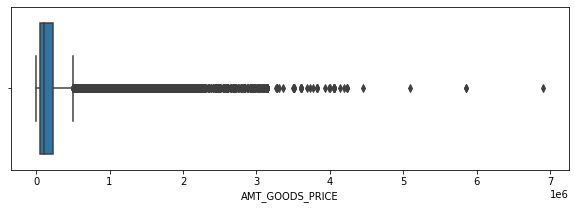

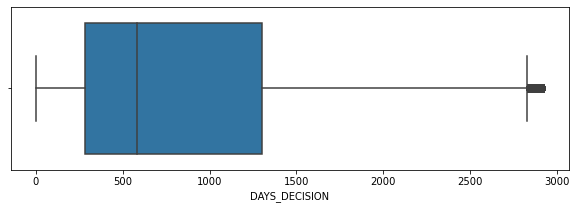

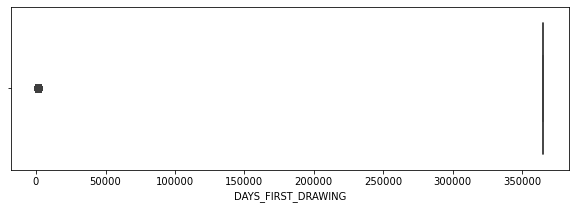

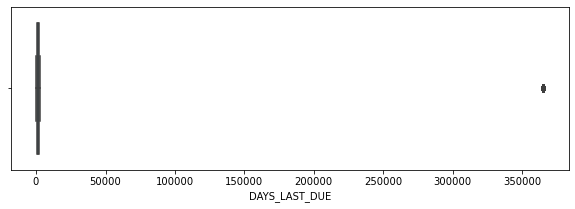

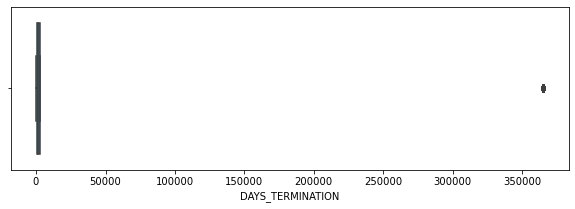

In [31]:
plt.figure(figsize=(10,3))
sns.boxplot(prev_data['AMT_APPLICATION'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(prev_data['AMT_CREDIT'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(prev_data['AMT_GOODS_PRICE'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(prev_data['DAYS_DECISION'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(prev_data['DAYS_FIRST_DRAWING'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(prev_data['DAYS_LAST_DUE'])
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(prev_data['DAYS_TERMINATION'])
plt.show()

## Insights after Outlier Analysis:-

### Application Data Dataset

- Variables DAYS_BIRTH and DAYS_ID_PUBLISH don't have any outlier in it. So we can use them as for further analysis purposes
- Variables CNT_FAM_MEMBERS,DAYS_REGISTRATION,DAYS_EMPLOYED,AMT_INCOME_TOTAL have outliers present in it
- Variable AMT_INCOME_TOTAL is having very skewed box plot which may represent that the income has too much variation it from lowest to maximum values

### Previous Application Dataset

- Variables AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION have outlierrs present in it.
- Variable DAYS_DECISION have less no of ouliers present in it

## Binning(Bucketing) Continuous Numerical Variable

### Application Data Dataset

In [32]:
#Bucketing Age in interval of 10 Years starting from 20 Years to 70 Years and creating new Column CLIENT_AGEGROUP
app_data['CLIENT_AGEGROUP']=pd.cut(app_data['YEAR_BIRTH'],[0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])

In [33]:
#Bucketing Days Employed in interval of 10 Years starting from 20 Years to 70 Years and creating new Column CLIENT_AGEGROUP
app_data['CLIENT_EMPLOYEDGROUP']=pd.cut(app_data['YEAR_EMPLOYED'],[0,10,20,30,40,50,9999],labels=['<10','10-20','20-30','30-40','40-50','50+'])

In [34]:
#Bucketing Client Income in interval of 1 Lac and creating new Column CLIENT_INCOMEGROUP
app_data['CLIENT_INCOMEGROUP']=pd.cut(app_data['AMT_INCOME_TOTAL'],[0,100000,200000,300000,400000,500000,1000000],labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH','EXTREMELY HIGH'])

In [35]:
#Bucketing Client Credit in interval of 2.5 Lacs and creating new Column CLIENT_CREDITGROUP
app_data['CLIENT_CREDITGROUP']=pd.cut(app_data['AMT_CREDIT'],[0,250000,500000,750000,1000000,1250000,5000000],labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH','EXTREMELY HIGH'])

### Previous Application Dataset

In [36]:
#Bucketing Application Amount in interval of 2 Lacs and creating new Column AMT_APPLICATIONGROUP
prev_data['AMT_APPLICATIONGROUP']=pd.cut(prev_data['AMT_APPLICATION'],[0,200000,400000,600000,800000,1000000,8000000],labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH','EXTREMELY HIGH'])

In [37]:
#Bucketing Credit Amount in interval of 2.5 Lacs and creating new Column AMT_CREDITGROUP
prev_data['AMT_CREDITGROUP']=pd.cut(prev_data['AMT_CREDIT'],[0,200000,400000,600000,800000,1000000,8000000],labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH','EXTREMELY HIGH'])

### Data Imbalance Check

In [38]:
#Checking the Distribution of Target Variable in Application Data Dataset
app_data['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

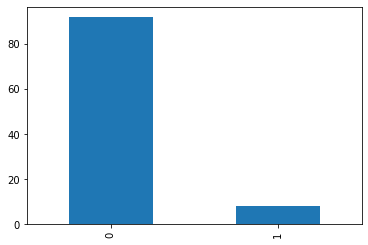

In [39]:
#Visualizing the distribution through Bar Plots
(app_data['TARGET'].value_counts(normalize=True)*100).plot.bar()
plt.show()

### Separating Dataframes based on Target Variable

In [40]:
app_data_repayer=app_data[app_data['TARGET']==0]

In [41]:
app_data_defaulter=app_data[app_data['TARGET']==1]

#### Checking the Shape of Dataframes created

In [42]:
print(app_data_repayer.shape)
print(app_data_defaulter.shape)

(282686, 87)
(24825, 87)


## Insights after Binning & Data Imbalance :-

- We found three variables YEAR_BIRTH,AMT_INCOME_TOTAL,AMT_CREDIT in Application Data Dataset as continuous Numerical which can be binned to various ranges.
- We found three variables AMT_APPLICATION,AMT_CREDITin Prev Data Dataset as continuous Numerical which can be binned to various ranges.
- Target Variable has severe Data Balance. Appox 91% data is with Target Value 0 and 9% is with Target Value 1. This Sort of Data Imbalance may impact our analysis.Hence we have subset our original data frame based on target variable value

# Univariate Analysis

### For Repayer & Defaulters Simultaneously on Application Dataset

In [43]:
app_data_repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,CLIENT_AGEGROUP,CLIENT_EMPLOYEDGROUP,CLIENT_INCOMEGROUP,CLIENT_CREDITGROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1188,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,40-50,<10,MEDIUM,EXTREMELY HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,225,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,50-60,<10,VERY LOW,VERY LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,3039,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,50-60,<10,LOW,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,3038,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,50-60,<10,LOW,MEDIUM
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,1588,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46,4,40-50,<10,VERY LOW,LOW


In [44]:
app_data_defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,CLIENT_AGEGROUP,CLIENT_EMPLOYEDGROUP,CLIENT_INCOMEGROUP,CLIENT_CREDITGROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,637,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,<30,<10,MEDIUM,LOW
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,2628,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,7,50-60,<10,LOW,HIGH
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1262,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,3,40-50,<10,MEDIUM,VERY HIGH
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,3597,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37,10,30-40,<10,LOW,LOW
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,365243,4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,68,1001,60+,50+,VERY LOW,LOW


###### NAME_CONTRACT_TYPE

In [45]:
#Checking the distribution
print(app_data_repayer['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100)
print(app_data_defaulter['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100)

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64
Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64


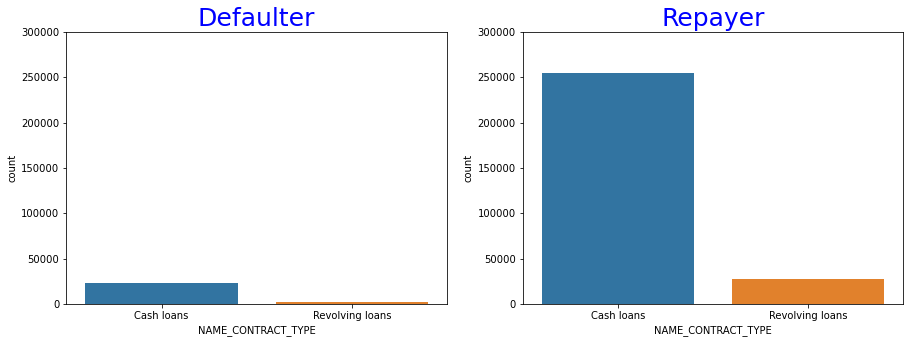

In [46]:
#Visualizing the distribution through Count Plots
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,ylim=(0,300000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['NAME_CONTRACT_TYPE'])
plt.subplot(1,2,2,ylim=(0,300000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['NAME_CONTRACT_TYPE'])
plt.show()

#### Insights:-

- Cash Loans are more preferred compared to revolving Loans
- The proportion of revolving loans is very less for the persons who has defaulted the loans.

##### NAME_TYPE_SUITE

In [47]:
#Checking the distribution
print(app_data_repayer['NAME_TYPE_SUITE'].value_counts(normalize=True)*100)
print(app_data_defaulter['NAME_TYPE_SUITE'].value_counts(normalize=True)*100)

Unaccompanied      81.072180
Family             13.195293
Spouse, partner     3.721613
Children            1.075093
Other_B             0.567035
Other_A             0.280675
Group of people     0.088111
Name: NAME_TYPE_SUITE, dtype: float64
Unaccompanied      82.153100
Family             12.155120
Spouse, partner     3.615431
Children            0.973541
Other_B             0.702888
Other_A             0.307009
Group of people     0.092911
Name: NAME_TYPE_SUITE, dtype: float64


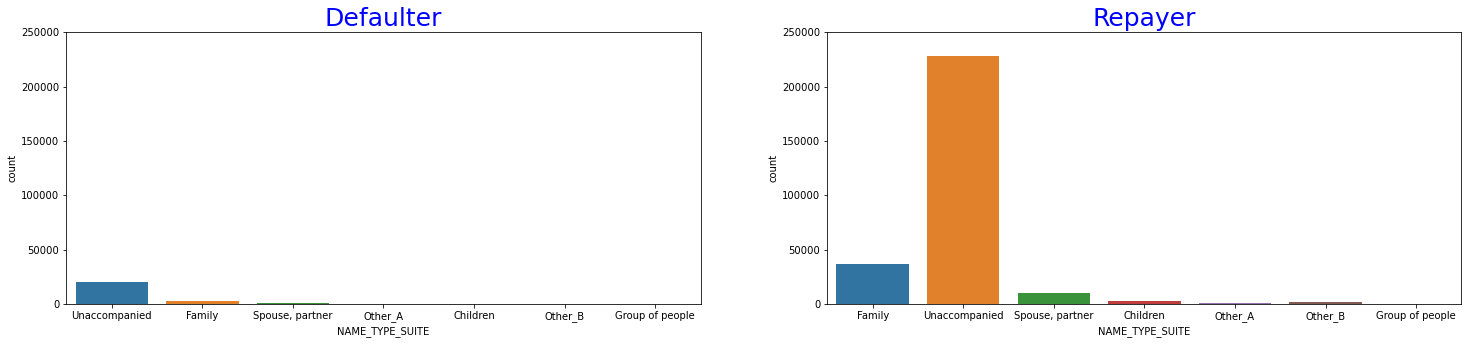

In [48]:
#Visualizing the distribution through Count Plots 
plt.figure(figsize=(25,5))
plt.subplot(1,2,1,ylim=(0,250000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['NAME_TYPE_SUITE'])
plt.subplot(1,2,2,ylim=(0,250000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['NAME_TYPE_SUITE'])
plt.show()

#### Insights:-

- Most of the People applying loans are not carrying anybody as the companion
- Some are carrying their Family for applying the loans
- People accompanied by somebody have very high chances of repaying the loans

##### NAME_INCOME_TYPE

In [49]:
#Checking the distribution of Type of Income
print(app_data_repayer['NAME_INCOME_TYPE'].value_counts(normalize=True)*100)
print(app_data_defaulter['NAME_INCOME_TYPE'].value_counts(normalize=True)*100)

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64
Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64


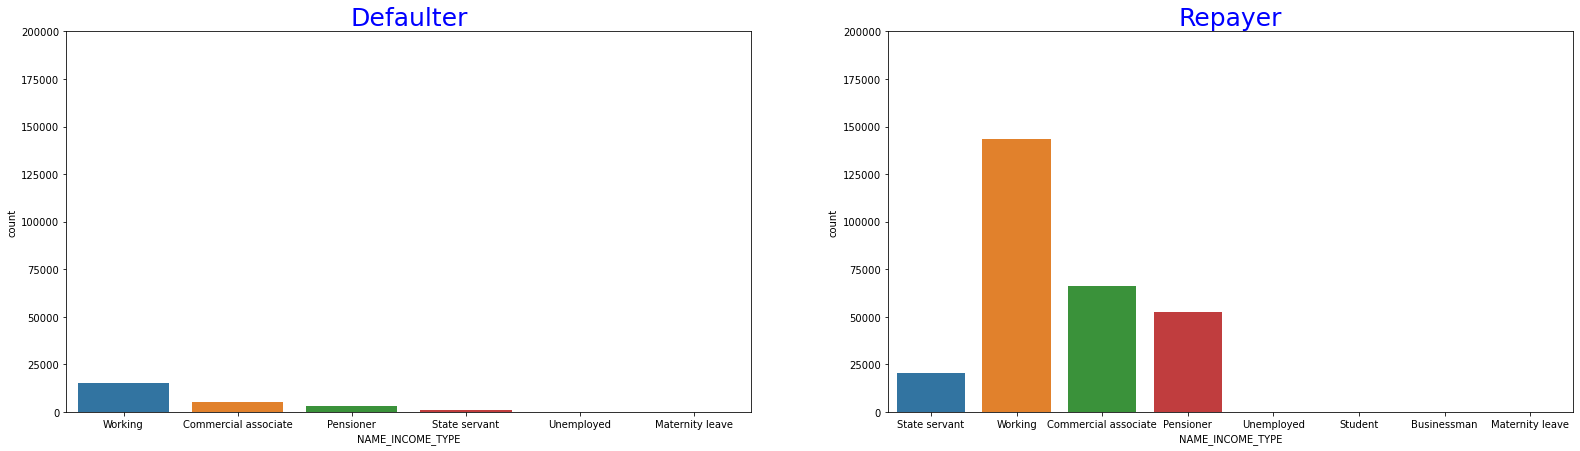

In [50]:
#Visualizing the distribution of Type of Income through Count Plots 
plt.figure(figsize=(27,7))
plt.subplot(1,2,1,ylim=(0,200000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['NAME_INCOME_TYPE'])
plt.subplot(1,2,2,ylim=(0,200000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['NAME_INCOME_TYPE'])
plt.show()

#### Insights:-

- Businessman are never defaulting any loans
- Working People are more likely to default the loans

##### NAME_FAMILY_STATUS

In [51]:
#Checking the distribution of Family Status of Client
print(app_data_repayer['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100)
print(app_data_defaulter['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100)

Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64
Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64


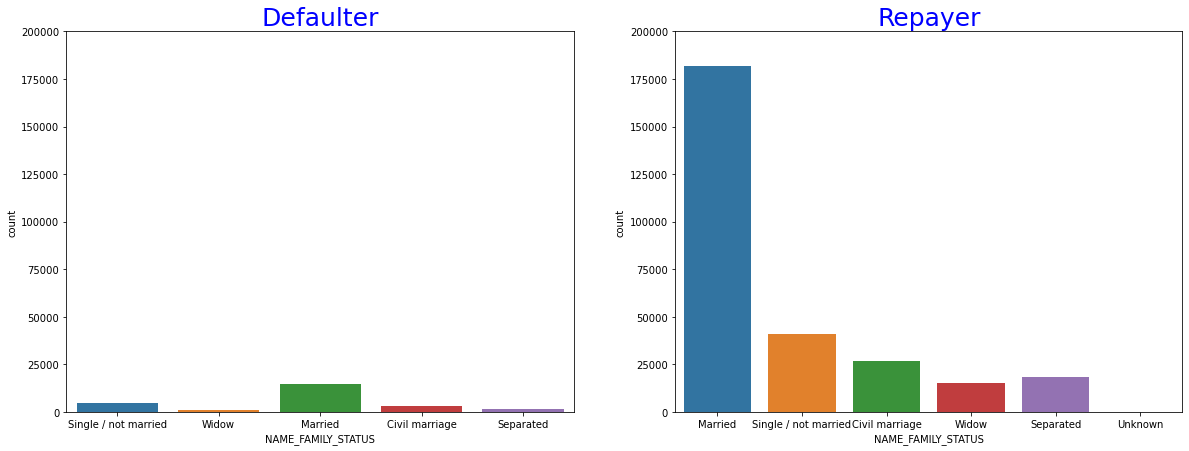

In [52]:
#Visualizing the distribution of Family Status of Client through Count Plots 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1,ylim=(0,200000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['NAME_FAMILY_STATUS'])
plt.subplot(1,2,2,ylim=(0,200000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['NAME_FAMILY_STATUS'])
plt.show()

#### Insights:-

- Widow,Separated are very least likely to default on loans
- Married People are more likely to default and repay both
- Single/Not married category is least likely to default however more likely to repay

##### OCCUPATION_TYPE

In [53]:
#Checking the distribution of Occupation Type of Client
print(app_data_repayer['OCCUPATION_TYPE'].value_counts(normalize=True)*100)
print(app_data_defaulter['OCCUPATION_TYPE'].value_counts(normalize=True)*100)

Laborers                 25.625607
Sales staff              15.064417
Core staff               13.414134
Managers                 10.408001
Drivers                   8.566102
High skill tech staff     5.545430
Accountants               4.849590
Medicine staff            4.136094
Security staff            3.115182
Cooking staff             2.765185
Cleaning staff            2.184107
Private service staff     1.286265
Low-skill Laborers        0.900438
Secretaries               0.629891
Waiters/barmen staff      0.621063
Realty agents             0.359344
HR staff                  0.273662
IT staff                  0.255488
Name: OCCUPATION_TYPE, dtype: float64
Laborers                 31.476789
Sales staff              16.671160
Drivers                  11.360328
Core staff                9.370788
Managers                  7.160188
Security staff            3.892813
High skill tech staff     3.779587
Cooking staff             3.348250
Medicine staff            3.084057
Accountants      

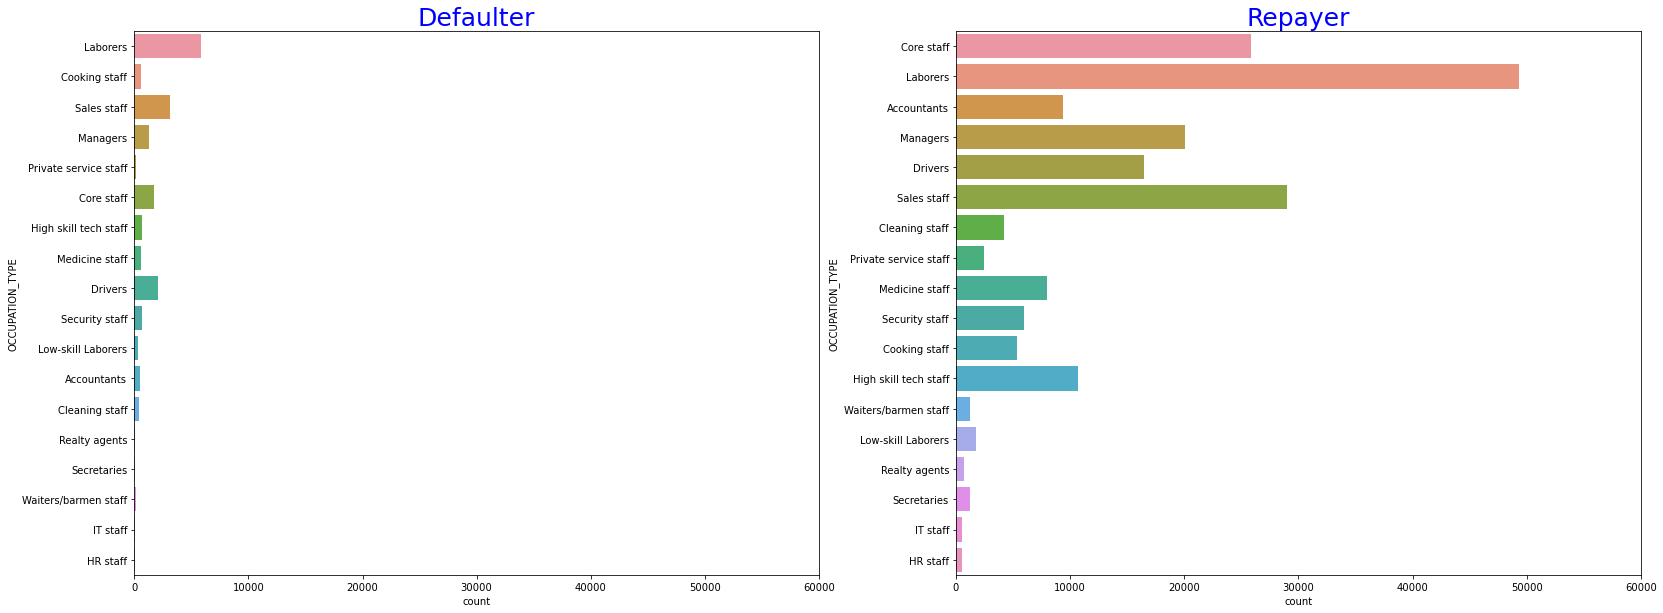

In [54]:
#Visualizing the distribution of Occupation Type of Client through Count Plots 
plt.figure(figsize=(27,10))
plt.subplot(1,2,1,xlim=(0,60000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(y=app_data_defaulter['OCCUPATION_TYPE'])
plt.subplot(1,2,2,xlim=(0,60000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(y=app_data_repayer['OCCUPATION_TYPE'])
plt.show()

#### Insights:-

- Laborers and Sales Staff are equally likely to default and repay
- Realty agents,Secretaries,Walters/barmen staff,IT staff,HR Staff have very less chance of defaulting the loan


##### CLIENT_AGEGROUP

In [55]:
#Checking the distribution of Age Group of Client
print(app_data_repayer['CLIENT_AGEGROUP'].value_counts(normalize=True)*100)
print(app_data_defaulter['CLIENT_AGEGROUP'].value_counts(normalize=True)*100)

30-40    26.517408
40-50    24.686047
50-60    22.587960
<30      15.308859
60+      10.899726
Name: CLIENT_AGEGROUP, dtype: float64
30-40    31.456193
40-50    23.061430
<30      22.529708
50-60    16.523666
60+       6.429003
Name: CLIENT_AGEGROUP, dtype: float64


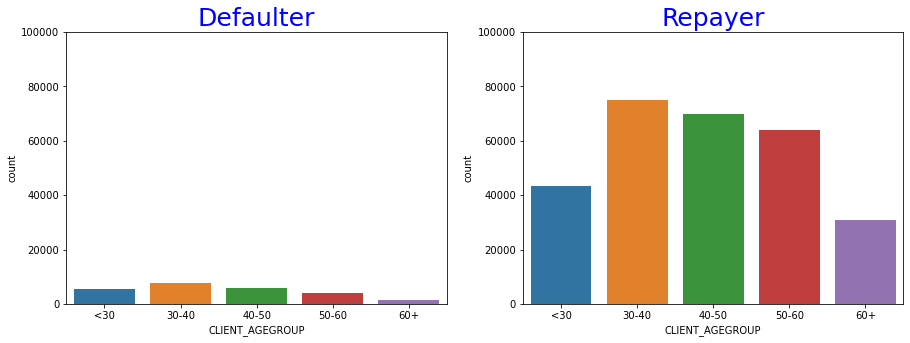

In [56]:
#Visualizing the distribution of Age Group of Client through Count Plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,ylim=(0,100000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['CLIENT_AGEGROUP'])
plt.subplot(1,2,2,ylim=(0,100000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['CLIENT_AGEGROUP'])
plt.show()

#### Insights:-

- Loans are applied mostly be people in age range of 30-40,40-50
- People with age 60+ are least likely to take loans. Moreover they have least chances of defaulting the loans
- People with older age 60+ primarily senior citizens are less likely to take loans compared to other age groups
- People in age group 30-40 and most likely to repay the loan


##### CLIENT_INCOMEGROUP

In [57]:
#Checking the distribution of Income Group of Client
print(app_data_repayer['CLIENT_INCOMEGROUP'].value_counts(normalize=True)*100)
print(app_data_defaulter['CLIENT_INCOMEGROUP'].value_counts(normalize=True)*100)

LOW               50.477077
MEDIUM            21.333055
VERY LOW          20.702144
HIGH               4.882651
VERY HIGH          1.784039
EXTREMELY HIGH     0.821033
Name: CLIENT_INCOMEGROUP, dtype: float64
LOW               53.707883
VERY LOW          21.058359
MEDIUM            19.833145
HIGH               3.566823
VERY HIGH          1.297759
EXTREMELY HIGH     0.536031
Name: CLIENT_INCOMEGROUP, dtype: float64


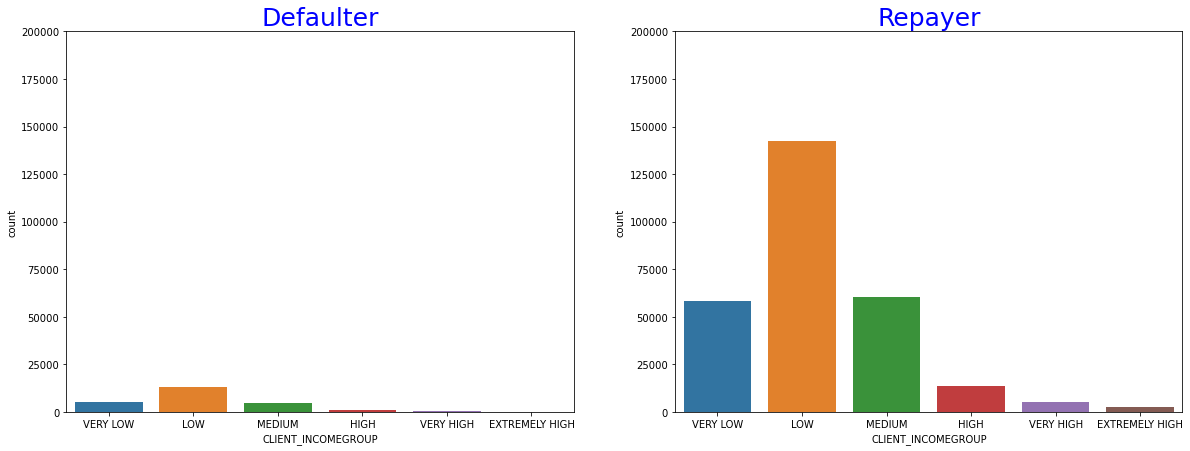

In [58]:
#Visualizing the distribution of Income Group of Client through Count Plots 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1,ylim=(0,200000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['CLIENT_INCOMEGROUP'])
plt.subplot(1,2,2,ylim=(0,200000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['CLIENT_INCOMEGROUP'])
plt.show()

#### Insights:-

- Loans are applied mostly be people in low income range(1 Lac to 2 Lac)
- People with Low Income (1 Lac to 2 Lac) have more chances to defaults on loans
- People with Very High (4 Lac to 5 Lac) and Extremely High (5 Lac+) are very less chance to become defaulter

##### CODE_GENDER

In [59]:
#Checking the distribution of Gender of Client
print(app_data_repayer['CODE_GENDER'].value_counts(normalize=True)*100)
print(app_data_defaulter['CODE_GENDER'].value_counts(normalize=True)*100)

F      66.603228
M      33.395357
XNA     0.001415
Name: CODE_GENDER, dtype: float64
F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64


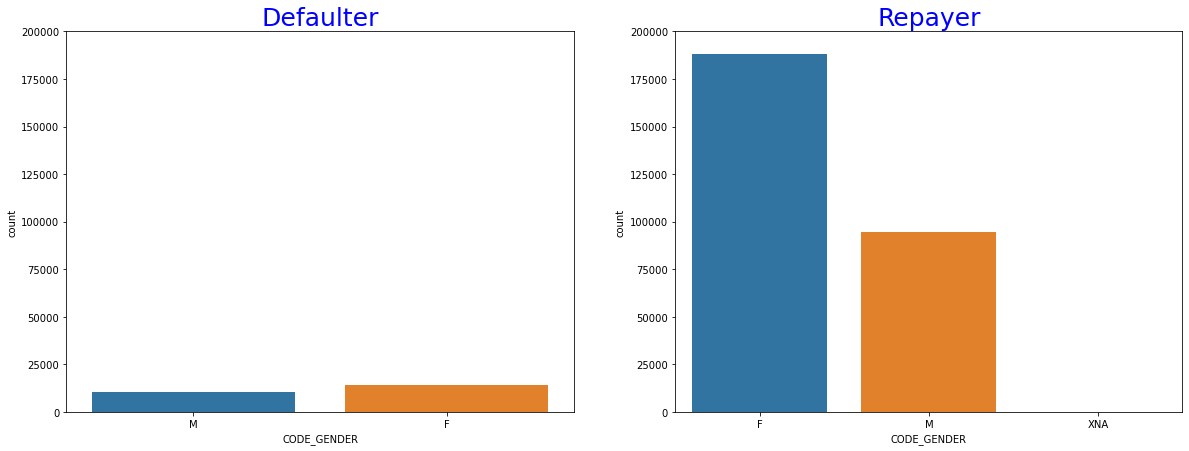

In [60]:
#Visualizing the distribution of Gender of Client through Count Plots 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1,ylim=(0,200000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['CODE_GENDER'])
plt.subplot(1,2,2,ylim=(0,200000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['CODE_GENDER'])
plt.show()

#### Insights:-

- Females are most likely to repay the loan as well. 
- Females Repayers are approx double of male Repayers

##### FLAG_OWN_CAR

In [61]:
#Checking the distribution of Car Owned by Client
print(app_data_repayer['FLAG_OWN_CAR'].value_counts(normalize=True)*100)
print(app_data_defaulter['FLAG_OWN_CAR'].value_counts(normalize=True)*100)

N    65.682418
Y    34.317582
Name: FLAG_OWN_CAR, dtype: float64
N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64


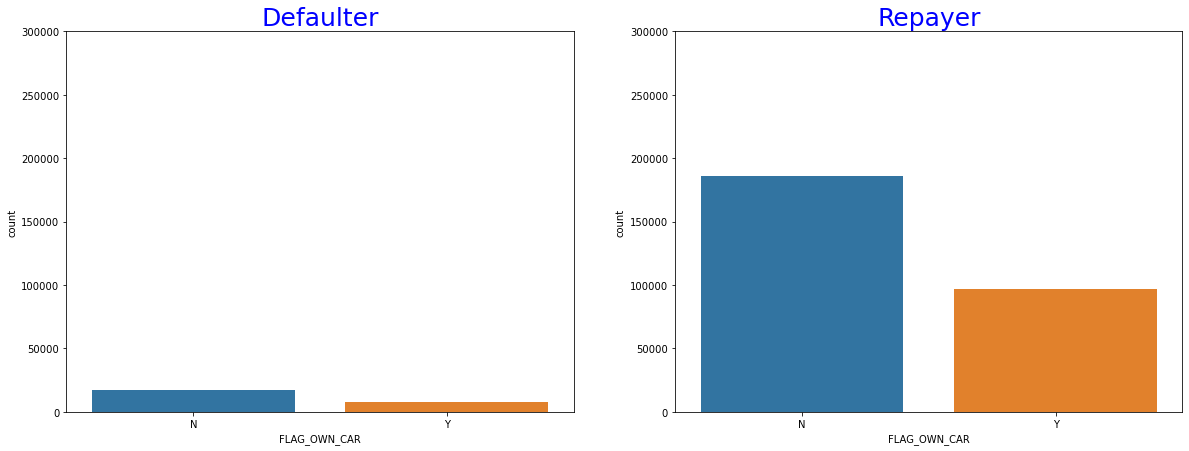

In [62]:
#Visualizing the distribution of Car Owned by Client through Count Plots 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1,ylim=(0,300000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['FLAG_OWN_CAR'])
plt.subplot(1,2,2,ylim=(0,300000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['FLAG_OWN_CAR'])
plt.show()

#### Insights:-

- People without car have more chances to default the loans

##### FLAG_OWN_REALTY

In [63]:
#Checking the distribution of House Owned by Client
print(app_data_repayer['FLAG_OWN_REALTY'].value_counts(normalize=True)*100)
print(app_data_defaulter['FLAG_OWN_REALTY'].value_counts(normalize=True)*100)

Y    69.451264
N    30.548736
Name: FLAG_OWN_REALTY, dtype: float64
Y    68.410876
N    31.589124
Name: FLAG_OWN_REALTY, dtype: float64


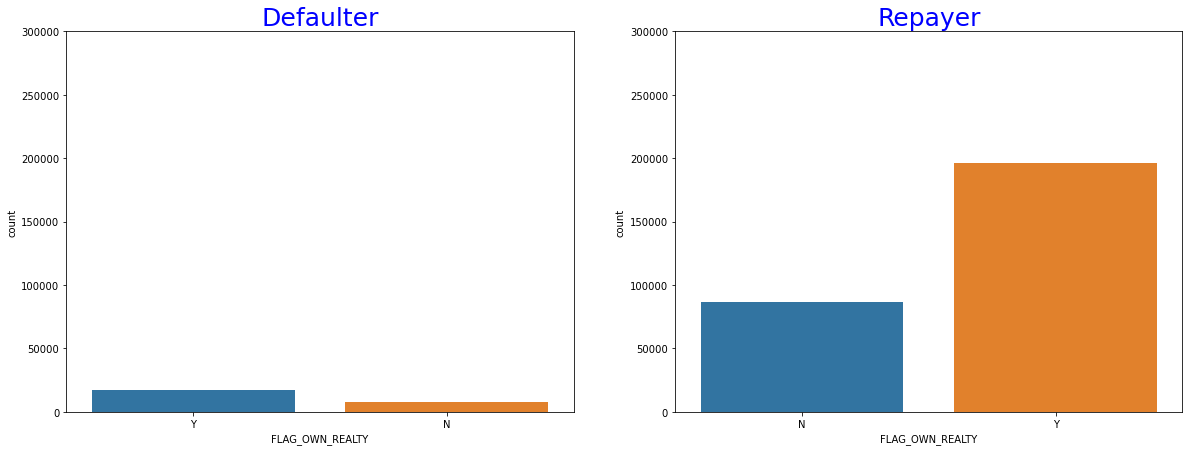

In [64]:
#Visualizing the distribution of House Owned by Client through Count Plots 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1,ylim=(0,300000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['FLAG_OWN_REALTY'])
plt.subplot(1,2,2,ylim=(0,300000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['FLAG_OWN_REALTY'])
plt.show()

#### Insights:-

- People who owns Flats have double the chances of repaying the loan


##### NAME_EDUCATION_TYPE

In [65]:
#Checking the distribution of Education of the Client
print(app_data_repayer['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100)
print(app_data_defaulter['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100)

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64
Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64


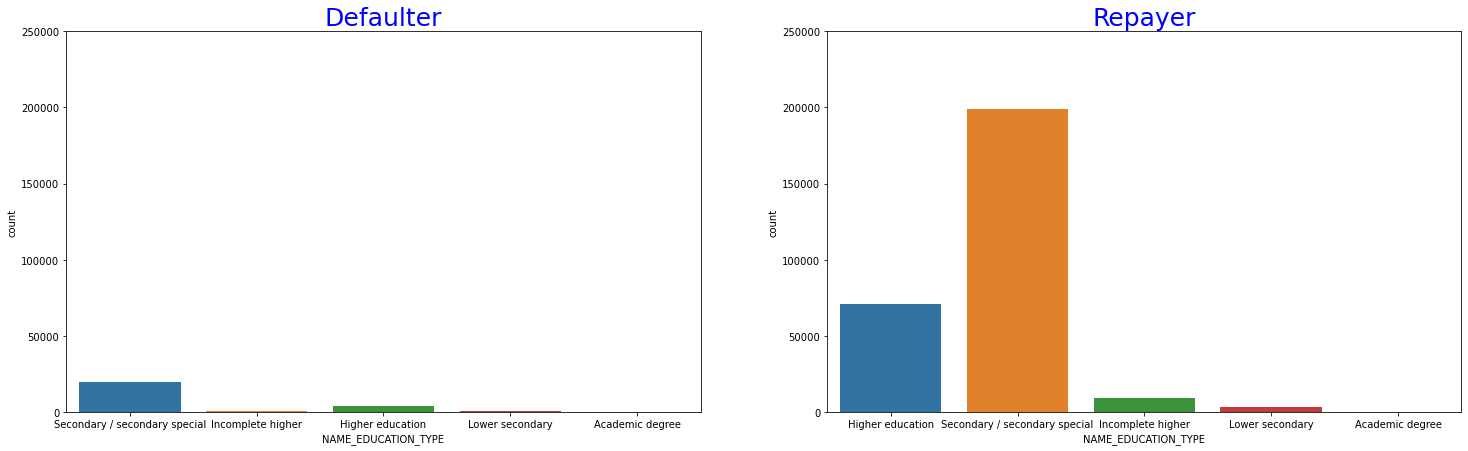

In [66]:
#Visualizing the distribution of Education of the Client through Count Plots 
plt.figure(figsize=(25,7))
plt.subplot(1,2,1,ylim=(0,250000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['NAME_EDUCATION_TYPE'])
plt.subplot(1,2,2,ylim=(0,250000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['NAME_EDUCATION_TYPE'])
plt.show()

#### Insights:-

- People with Secondary Education is more likely to repay the loan


##### NAME_HOUSING_TYPE

In [67]:
#Checking the distribution of Housing Type of the Client
print(app_data_repayer['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100)
print(app_data_defaulter['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100)

House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64
House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64


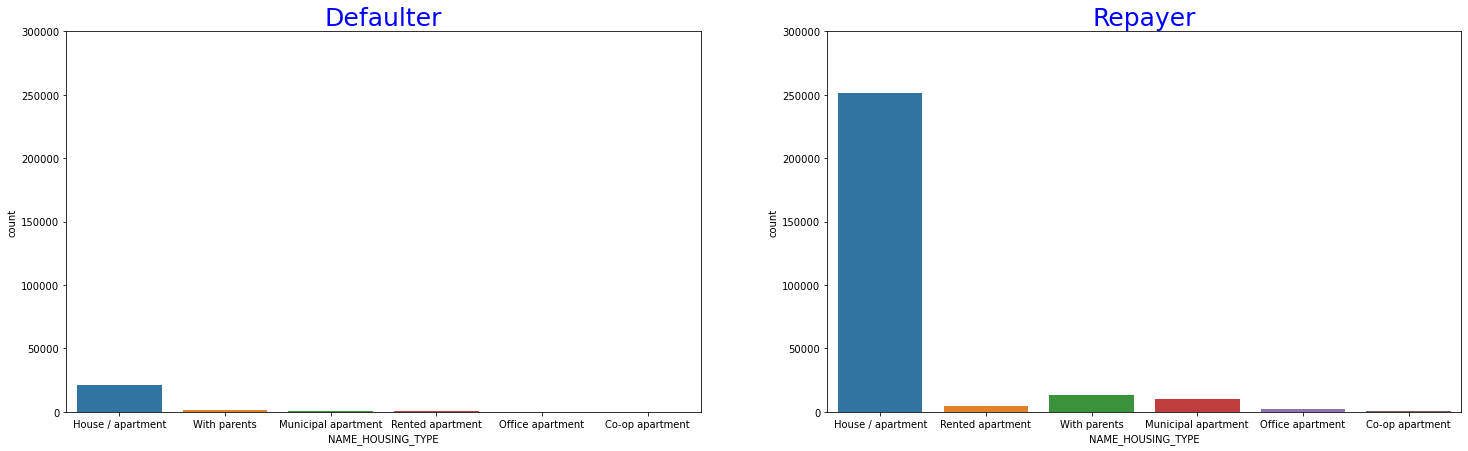

In [68]:
#Visualizing the distribution of Housing Type of the Client through Count Plots 
plt.figure(figsize=(25,7))
plt.subplot(1,2,1,ylim=(0,300000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['NAME_HOUSING_TYPE'])
plt.subplot(1,2,2,ylim=(0,300000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['NAME_HOUSING_TYPE'])
plt.show()

#### Insights:-

- People with House/Apartment is more likely to repay the loan


##### CLIENT_EMPLOYEDGROUP

In [69]:
#Checking the distribution of Employed Group of the Client
print(app_data_repayer['CLIENT_EMPLOYEDGROUP'].value_counts(normalize=True)*100)
print(app_data_defaulter['CLIENT_EMPLOYEDGROUP'].value_counts(normalize=True)*100)

<10      64.557175
50+      19.120481
10-20    12.241576
20-30     3.107297
30-40     0.900105
40-50     0.073366
Name: CLIENT_EMPLOYEDGROUP, dtype: float64
<10      77.373797
50+      12.567778
10-20     7.982010
20-30     1.723341
30-40     0.348871
40-50     0.004203
Name: CLIENT_EMPLOYEDGROUP, dtype: float64


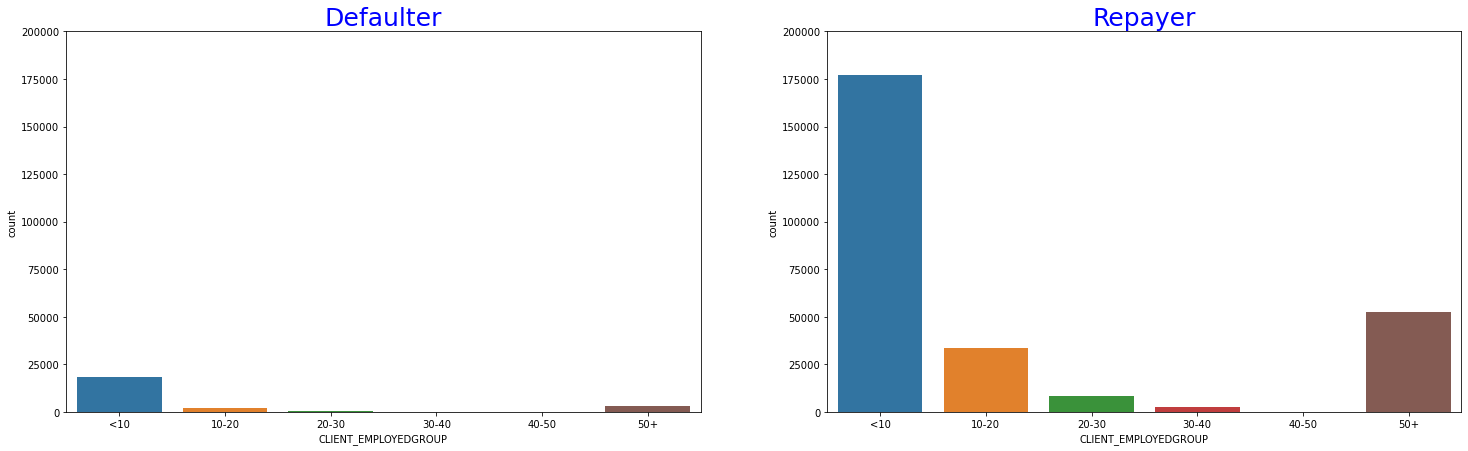

In [70]:
#Visualizing the distribution of Employed Group of the Client through Count Plots 
plt.figure(figsize=(25,7))
plt.subplot(1,2,1,ylim=(0,200000))
plt.title('Defaulter',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_defaulter['CLIENT_EMPLOYEDGROUP'])
plt.subplot(1,2,2,ylim=(0,200000))
plt.title('Repayer',fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Blue'})
sns.countplot(app_data_repayer['CLIENT_EMPLOYEDGROUP'])
plt.show()

#### Insights:-

- People who are employed with more than 50+Years are likely to default less however most likely to repay.
- People who are employed with less than 10 years are most likely to default compared to other time periods


## Correlation Analysis on Repayer Data

In [71]:
#Creating the correlation matrix
corr_repayer = app_data_repayer[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
corr_repayer.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.140392,-0.022896,0.034256,0.076743,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.070104,0.001464,0.064536,0.053619,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.104978,-0.014113,0.075787,0.053589,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.068609,0.003649,0.062814,0.062766,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,-0.007198,0.001071,-0.023425,0.172814,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775


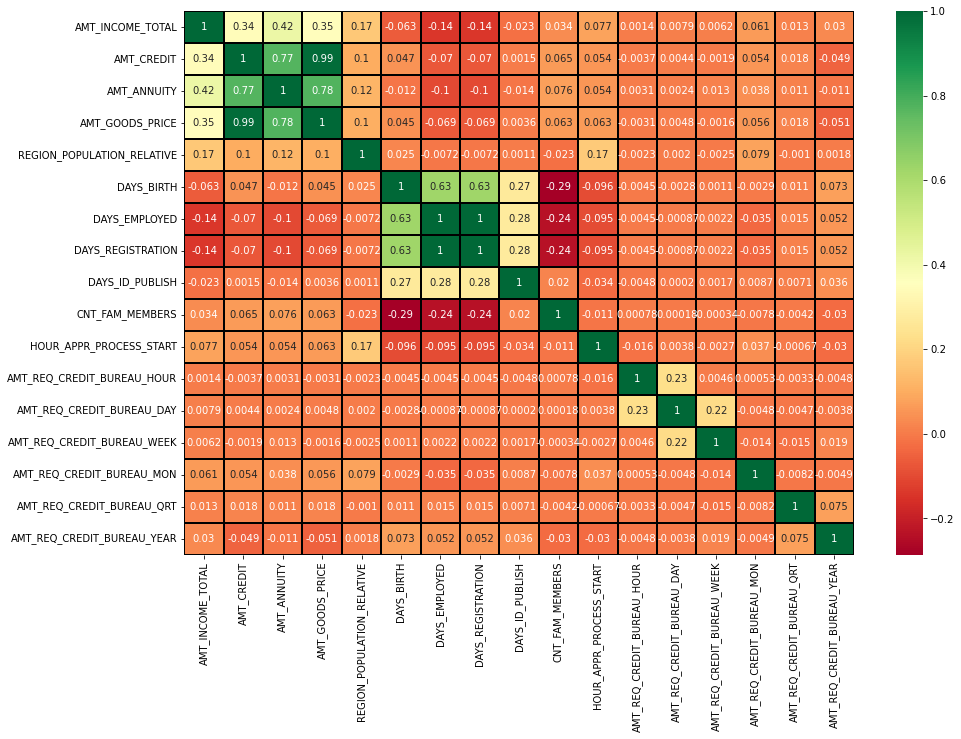

In [72]:
#Visualizing the coorelation matrix through heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_repayer,cmap='RdYlGn',annot=True,linewidths=2,linecolor='black')
plt.show()

### Insights:-

- Following are top three Correlations:-

    - AMT_CREDIT VS AMT_GOODS_PRICE
    - AMT_ANNUITY VS AMT_GOODS_PRICE
    - AMT_CREDIT VS AMT_ANNUITY


- Other Strong Correlations are as follows:-

    - DAYS_BIRTH VS DAYS_EMPLOYED
    - DAYS_BIRTH VS DAYS_REGISTRATION
    - AMT_ANNUITY VS AMT_INCOME_TOTAL
    - AMT_INCOME_TOTAL VS AMT_GOODS_PRICE
    - AMT_CREDIT VS AMT_INCOME_TOTAL
    - DAYS_ID_PUBLISH VS DAYS_EMPLOYED 
    - DAYS_ID_PUBLISH VS DAYS_REGISTRATION
    - DAYS_ID_PUBLISH VS DAYS_BIRTH
    - AMT_REQ_CREDIT_BUREAU_HOUR VS AMT_REQ_CREDIT_BUREAU_DAY
    - AMT_REQ_CREDIT_BUREAU_DAY VS AMT_REQ_CREDIT_BUREAU_WEEK

## Correlation Analysis on Defaulter Data

In [73]:
#Creating the correlation matrix
corr_defaulter = app_data_defaulter[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
corr_defaulter.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014977,-0.014977,0.004215,0.006654,0.013775,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103,0.069161,0.135316,0.001930,0.001930,0.052329,0.051224,0.031782,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699,0.071690,0.014303,-0.081207,-0.081207,0.016767,0.075711,0.031236,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000,0.076049,0.135810,0.006642,0.006642,0.056086,0.047388,0.044315,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
REGION_POPULATION_RELATIVE,0.009135,0.069161,0.071690,0.076049,1.000000,0.048190,0.015532,0.015532,0.015537,-0.030163,0.142744,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.000602


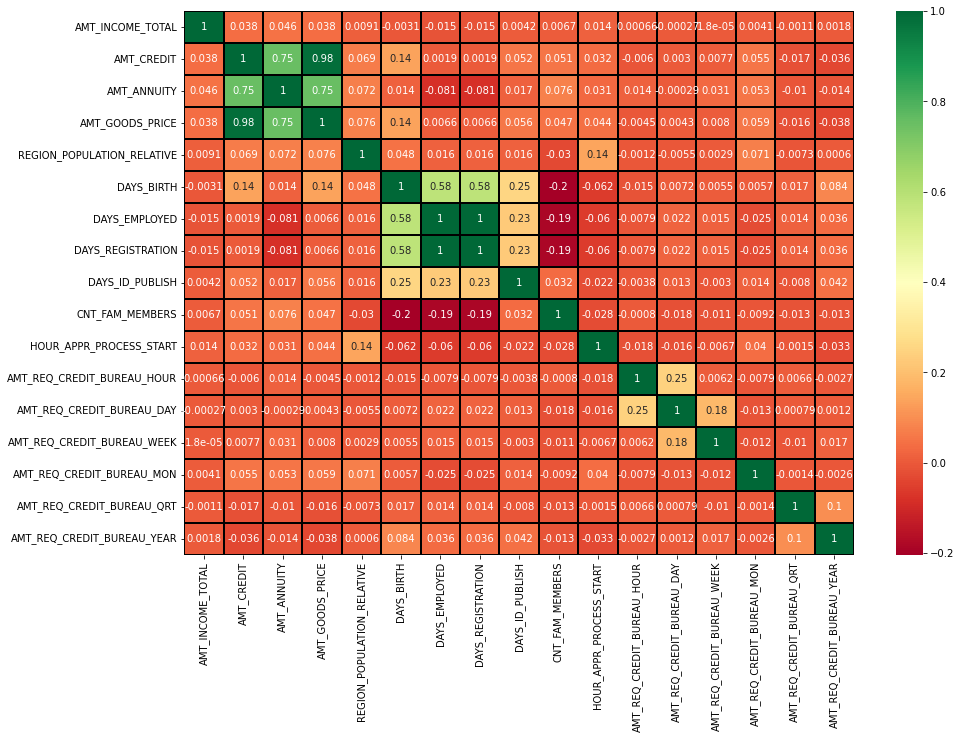

In [74]:
#Visualizing the coorelation matrix through heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_defaulter,cmap='RdYlGn',annot=True,linewidths=2,linecolor='black')
plt.show()

### Insights:-

- Following are top three Correlations:-

    - AMT_CREDIT VS AMT_GOODS_PRICE
    - AMT_CREDIT VS AMT_ANNUITY
    - AMT_ANNUITY VS AMT_GOODS_PRICE
    

- Other Strong Correlations are as follows:-

    - DAYS_BIRTH VS DAYS_EMPLOYED
    - DAYS_BIRTH VS DAYS_REGISTRATION
    - DAYS_BIRTH VS DAYS_ID_PUBLISH
    - AMT_REQ_CREDIT_BUREAU_HOUR VS AMT_REQ_CREDIT_BUREAU_DAY
    - DAYS_ID_PUBLISH VS DAYS_EMPLOYED
    - DAYS_ID_PUBLISH VS DAYS_REGISTRATION
    - AMT_REQ_CREDIT_BUREAU_DAY VS AMT_REQ_CREDIT_BUREAU_WEEK


# Bivariate & Multivariate Analysis

##### NAME_INCOME_TYPE VS AMT_INCOME_TOTAL

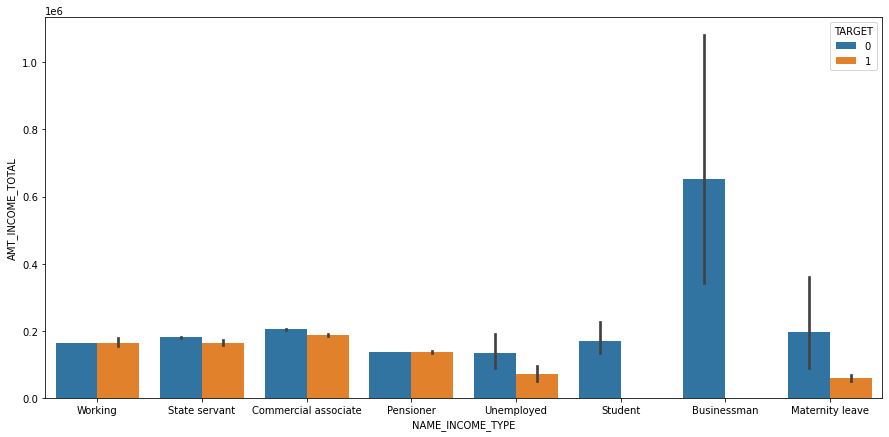

In [75]:
plt.figure(figsize=(15,7))
sns.barplot(data=app_data,x='NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

#### Insights:-

- Businessman and students are never defaulting any loans
- Working People and Pensioner have equal chances of defaulting and repaying the loans.
- Womens on Maternity leave have high chances of repaying the loan rather defaulting the loans

##### NAME_EDUCATION_TYPE VS AMT_INCOME_TOTAL

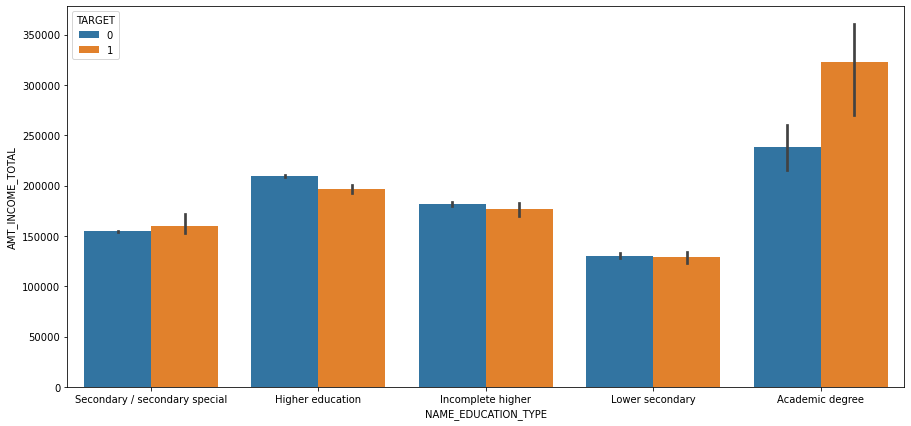

In [76]:
plt.figure(figsize=(15,7))
sns.barplot(data=app_data,x='NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

#### Insights:-

- People with Academic Degree have more chances to default the loans

##### FLAG_OWN_CAR VS CODE_GENDER

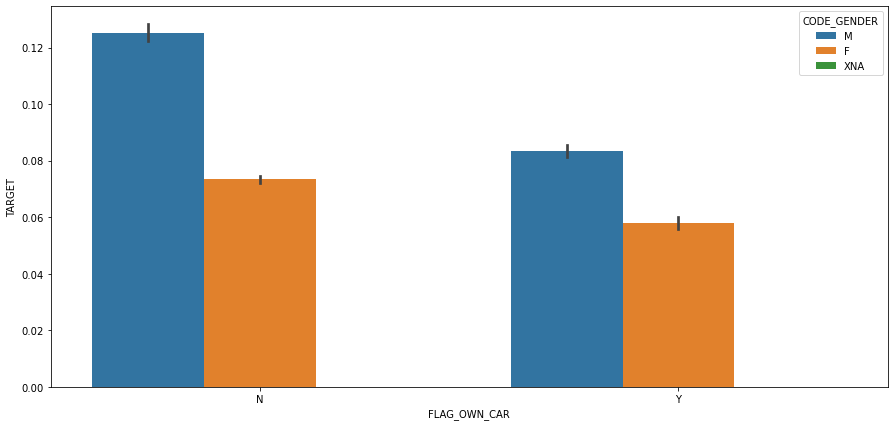

In [77]:
plt.figure(figsize=(15,7))
sns.barplot(data=app_data,x='FLAG_OWN_CAR', y = 'TARGET',hue='CODE_GENDER')
plt.show()

#### Insights:-

- Males who do not own the car are most likely to default the loans compared to who owns the car.

##### NAME_INCOME_TYPE VS NAME_EDUCATION_TYPE

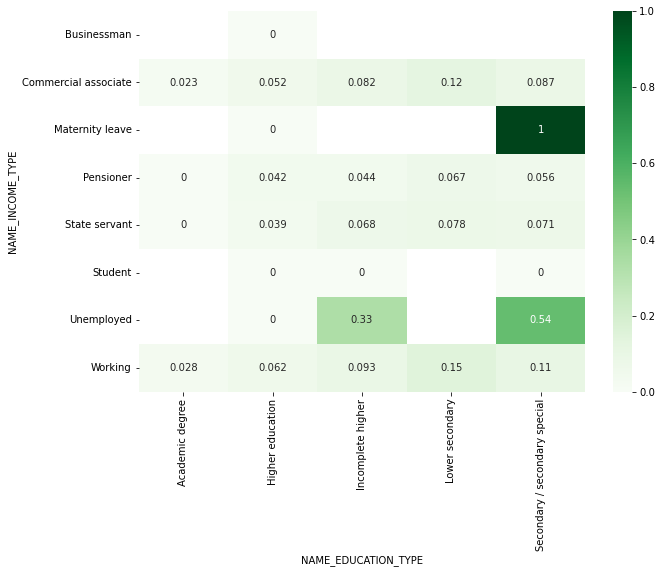

In [78]:
pivot1=pd.pivot_table(data=app_data,index='NAME_INCOME_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')
plt.figure(figsize=(10,7))
sns.heatmap(pivot1,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- Unemployed people with Secondary Education are more likely the defaulters

##### NAME_FAMILY_STATUS VS NAME_EDUCATION_TYPE

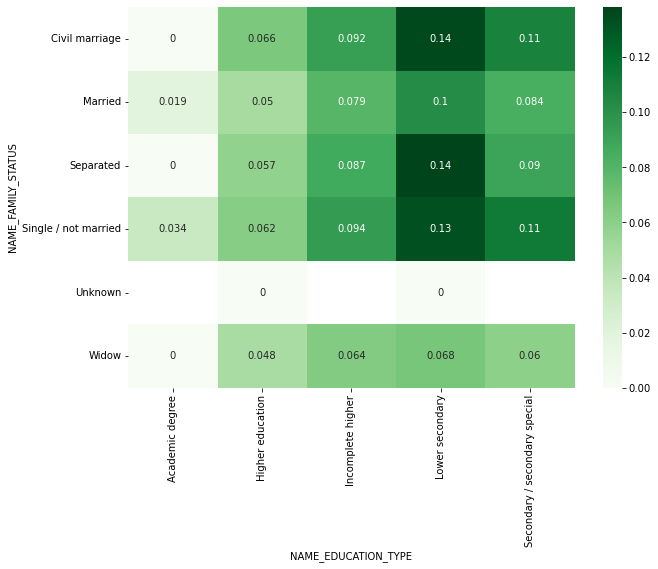

In [79]:
pivot2=pd.pivot_table(data=app_data,index='NAME_FAMILY_STATUS',columns='NAME_EDUCATION_TYPE',values='TARGET')
plt.figure(figsize=(10,7))
sns.heatmap(pivot2,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- People with Lower Secondary education are more likely to defaulters
- People who are single/not married and have Secondary Education are likely to be defaulters
- People who have done civil marriage and have Secondary Education are likely to be defaulters

##### NAME_INCOME_TYPE VS NAME_FAMILY_STATUS

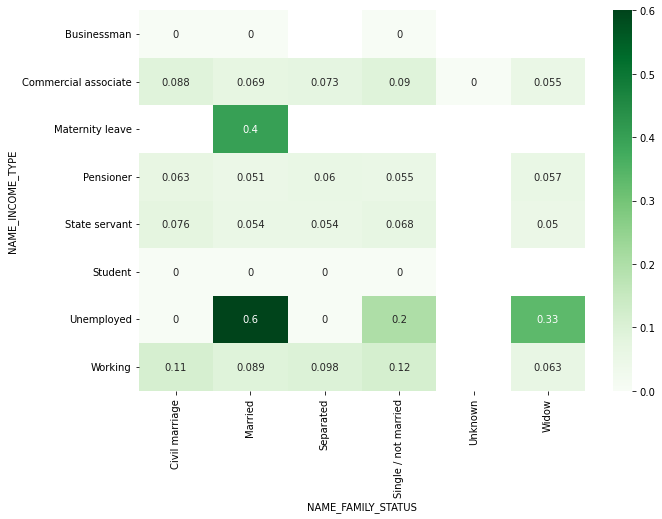

In [80]:
pivot3=pd.pivot_table(data=app_data,index='NAME_INCOME_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')
plt.figure(figsize=(10,7))
sns.heatmap(pivot3,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- Married Unemployed people are more likely the defaulters
- Unemployed Widow are likely to be defaulters

##### NAME_INCOME_TYPE VS NAME_HOUSING_TYPE

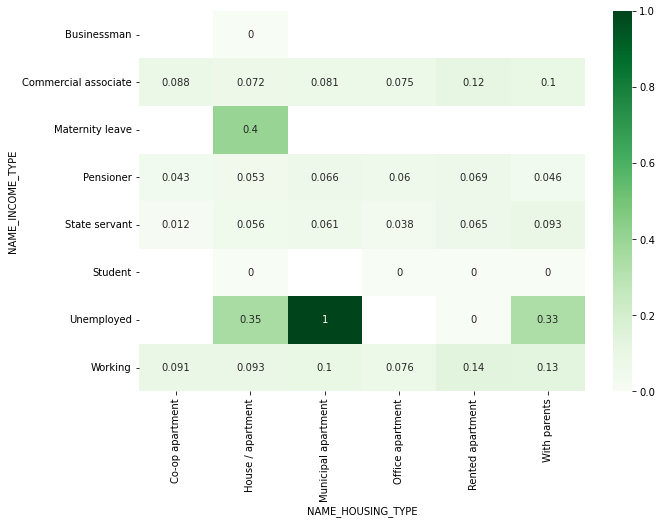

In [81]:
pivot4=pd.pivot_table(data=app_data,index='NAME_INCOME_TYPE',columns='NAME_HOUSING_TYPE',values='TARGET')
plt.figure(figsize=(10,7))
sns.heatmap(pivot4,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- Unemployed people living in Municipal apartment will be defaulters always

##### NAME_EDUCATION_TYPE VS NAME_HOUSING_TYPE

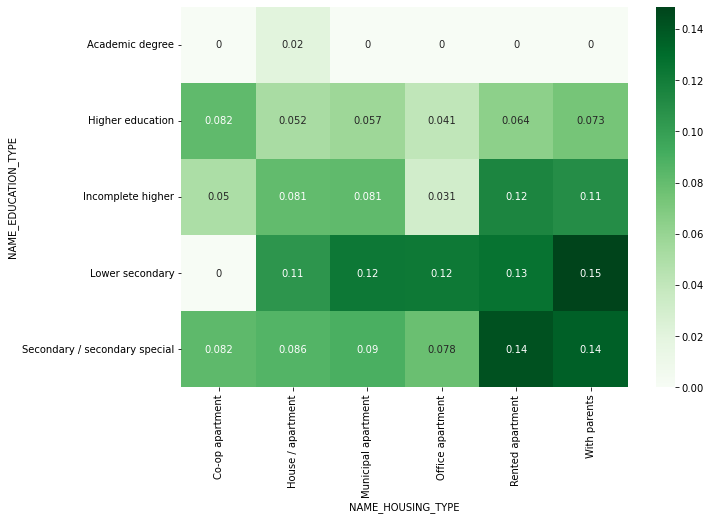

In [82]:
pivot5=pd.pivot_table(data=app_data,index='NAME_EDUCATION_TYPE',columns='NAME_HOUSING_TYPE',values='TARGET')
plt.figure(figsize=(10,7))
sns.heatmap(pivot5,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- People with Lower Secondary education and living with parents are more likely to be defaulters
- People with Secondary education and living in rented apartments or with parents are more likely to be defaulters

##### NAME_FAMILY_STATUS VS NAME_HOUSING_TYPE

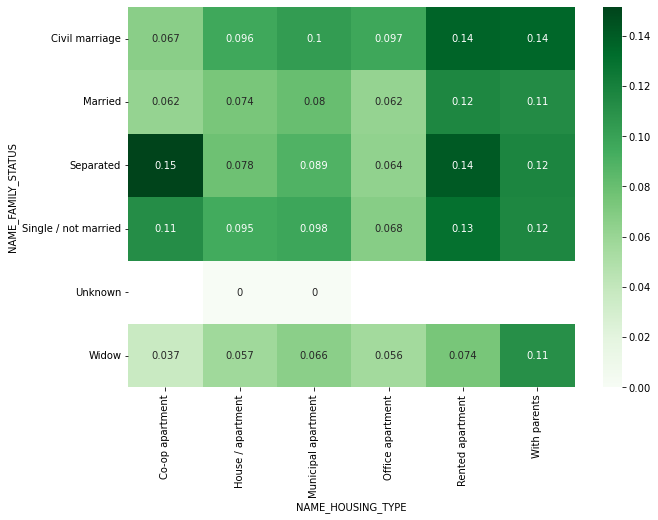

In [83]:
pivot6=pd.pivot_table(data=app_data,index='NAME_FAMILY_STATUS',columns='NAME_HOUSING_TYPE',values='TARGET')
plt.figure(figsize=(10,7))
sns.heatmap(pivot6,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- People who are separated and living in Co-op Apartments are more likely to be defaulters
- People who are living in Rented Apartments are more likely to be defaulters except widows
- People living with parents are more likely to be defaulters
- People who are single/not married living in Co-op Apartment are more likely to be defaulters 

##### OCCUPATION_TYPE VS NAME_EDUCATION_TYPE

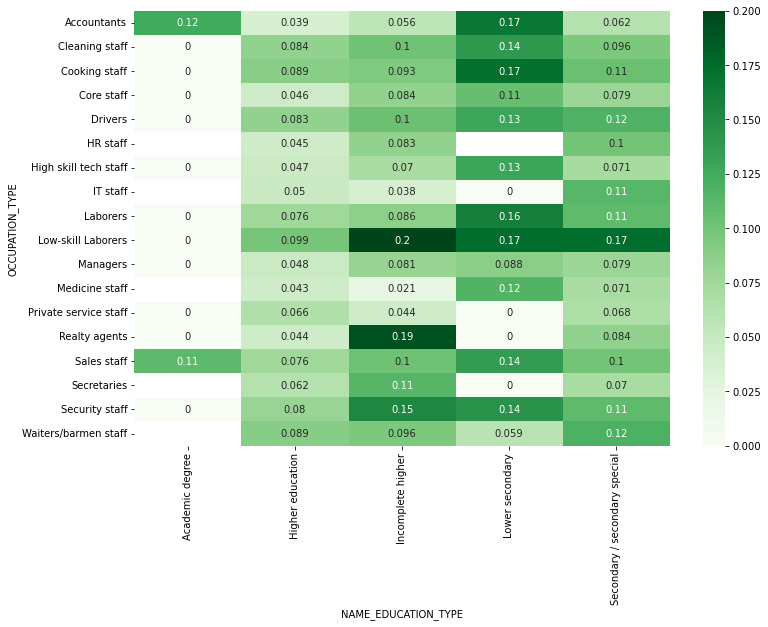

In [84]:
plt.figure(figsize=(12,8))
pivot7=pd.pivot_table(data=app_data,index='OCCUPATION_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')
sns.heatmap(pivot7,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- People who are Low Skill Laborer are more likely to be defaulters except those having higher education
- People who are Realty Agents and have incomplete higher education are more likely to be defaulters

##### OCCUPATION_TYPE VS NAME_FAMILY_STATUS

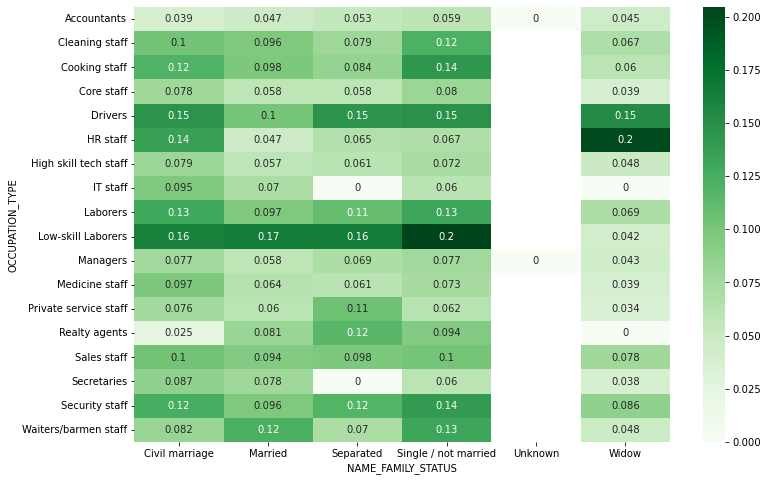

In [85]:
plt.figure(figsize=(12,8))
pivot8=pd.pivot_table(data=app_data,index='OCCUPATION_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')
sns.heatmap(pivot8,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- People who are Low Skill Laborer are more likely to be defaulters except Widows
- Widows who are working as Drivers and HR Staff are more likely to be defaulters
- People who are working as drivers are more likely to be defaulters

##### OCCUPATION_TYPE VS NAME_HOUSING_TYPE

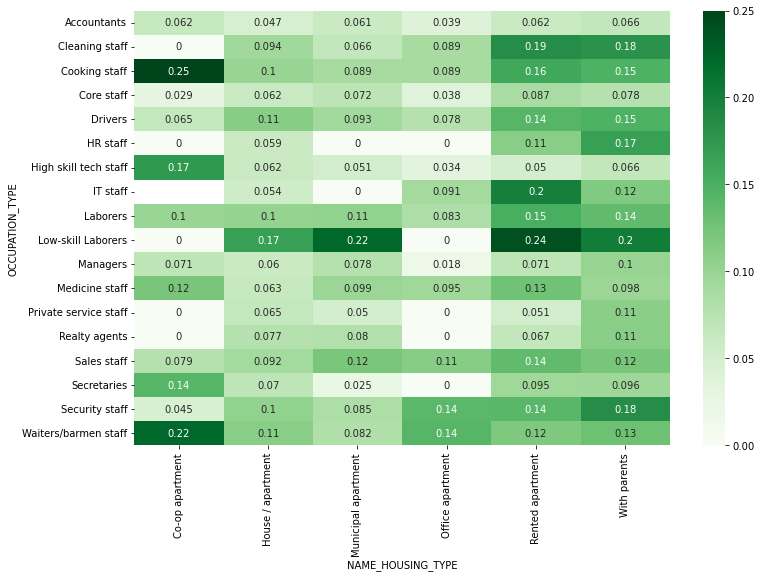

In [86]:
plt.figure(figsize=(12,8))
pivot8=pd.pivot_table(data=app_data,index='OCCUPATION_TYPE',columns='NAME_HOUSING_TYPE',values='TARGET')
sns.heatmap(pivot8,cmap='Greens',annot=True)
plt.show()

#### Insights:-

- People who are living in Co-Op Apartment and working as Cooking Staff or Waiters/Barmen Staff are more likely to be defaulters
- People who are living in Co-Op Apartment and working as High Skill Tech Staff are more likely to be defaulters
- People who are living with Parents and working as Security Staff are more likely to be defaulters
- People who are living with Parents or in Rented Apartments and working as Cleaning Staff are more likely to be defaulters

# Merging the Datasets for further Analysis

In [87]:
# Merge application dataset with prev application dataset into merged dataset using inner join
merged_data = pd.merge(left=app_data,right=prev_data, how='inner', on='SK_ID_CURR')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,CLIENT_AGEGROUP,CLIENT_EMPLOYEDGROUP,CLIENT_INCOMEGROUP,CLIENT_CREDITGROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_APPLICATIONGROUP,AMT_CREDITGROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,637,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,<30,<10,MEDIUM,LOW,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,VERY LOW,VERY LOW
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1188,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,40-50,<10,MEDIUM,EXTREMELY HIGH,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,VERY HIGH,EXTREMELY HIGH
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1188,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,40-50,

In [88]:
#Checking the shape of merged Dataset
merged_data.shape

(1413701, 121)

### Separating Dataframes based on Target Variable

In [89]:
merged_data_repayer=merged_data[merged_data['TARGET']==0]

In [90]:
merged_data_defaulter=merged_data[merged_data['TARGET']==1]

#### Checking the Shape of Dataframes created

In [91]:
print(merged_data_repayer.shape)
print(merged_data_defaulter.shape)

(1291341, 121)
(122360, 121)


# Analysis

### For Repayer & Defaulters Simultaneously on Merged Dataset

In [92]:
merged_data_repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,CLIENT_AGEGROUP,CLIENT_EMPLOYEDGROUP,CLIENT_INCOMEGROUP,CLIENT_CREDITGROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_APPLICATIONGROUP,AMT_CREDITGROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1188,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,40-50,<10,MEDIUM,EXTREMELY HIGH,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,VERY HIGH,EXTREMELY HIGH
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1188,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,40-50,<10,MEDIUM,EXTREMELY HIGH,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,LOW,LOW
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1188,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,40-50,<10,MEDIUM,EXTREMELY

In [93]:
merged_data_defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,CLIENT_AGEGROUP,CLIENT_EMPLOYEDGROUP,CLIENT_INCOMEGROUP,CLIENT_CREDITGROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_APPLICATIONGROUP,AMT_CREDITGROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,637,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,<30,<10,MEDIUM,LOW,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,VERY LOW,VERY LOW
161,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1262,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,3,40-50,<10,MEDIUM,VERY HIGH,1472630,Revolving loans,22500.000,0.0,450000.0,NaN,SATURDAY,14,Y,1,XAP,Approved,1172,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0,NaN,MEDIUM
162,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1262,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0

##### NAME_CONTRACT_STATUS VS NAME_CONTRACT_STATUS

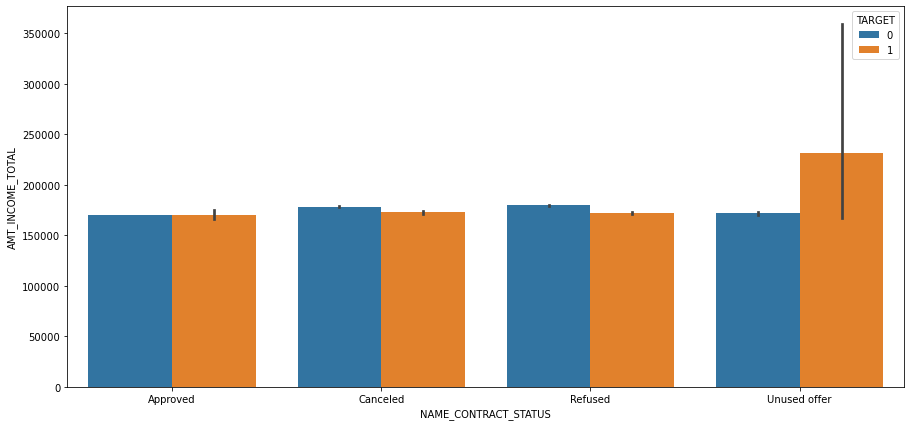

In [94]:
plt.figure(figsize=(15,7))
sns.barplot(data=merged_data,x='NAME_CONTRACT_STATUS', y = 'AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

#### Insights:-

- People who have Unused Offer are more likely to be defaulters

# Conclusion

## General Conclusions

- Cash loans widely preferred loan type
- Mostly People are unaccompanied by somebody while applying for loans
- Loans are applied mostly be people in age range of 30-40,40-50
- People with 60+ primarily senior citizens are very less likely to apply for loans
- Loans are applied mostly be people in low income range(1 Lac to 2 Lac)
- Females Re payers are approx. double of male Re payers

## Loans to be offered on Higher Interest Rates

- Working People and Pensioner as they have equal chances of repaying and defaulting the loans.

## Defaulters 

- Married People have more chances to default
- People with age 60+ are least likely to take loans. Moreover they have least chances of defaulting the loans
- People with Low Income (1 Lac to 2 Lac) have more chances to defaults on loans
- People without car
- People who are employed with less than 10 years
- People with Academic Degree
- Males who do not own the car
- Unemployed people with Secondary Education
- People with Lower Secondary education
- People who are single/not married and have Secondary Education
- People who have done civil marriage and have Secondary Education
- Married Unemployed people
- Unemployed Widow
- Unemployed people living in Municipal apartment
- People with Lower Secondary education and living with parents
- People with Secondary education and living in rented apartments or with parents
- People who are separated and living in Co-op Apartments
- People living with parents
- People who are single/not married living in Co-op Apartments
- People who are Low Skill Laborer except those having higher education
- People who are Realty Agents and have incomplete higher education
- Widows who are working as Drivers and HR Staff
- People who are working as drivers
- People who are living in Co-Op Apartment and working as Cooking Staff or Waiters/Barmen Staff
- People who are living in Co-Op Apartment and working as High Skill Tech Staff
- People who are living with Parents and working as Security Staff
- People who are living with Parents or in Rented Apartments and working as Cleaning Staff
- People who have Unused Offer are more likely to be defaulters

## Repayer

- People accompanied by somebody have higher chances
- Businessman and students are good choice to give loans
- Single Not Married people are good choice to give loans
- Realty agents, Secretaries, Walters/barmen staff, IT staff, HR Staff are good choice to give loans
- People in age group 30-40 and most likely to repay the loan
- People with Very High (4 Lac to 5 Lac) and Extremely High (5 Lac+)
- Females are most likely to repay the loan as well
- People who owns Flats
- People with Secondary Education
- People with House/Apartment
- People who are employed with more than 50+Years
- Women on Maternity leave